In [56]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score

In [11]:
train = pd.read_csv("Data/train_allx.csv")
y_train = pd.read_csv("Data/train_y.csv")
test = pd.read_csv("Data/val_allx.csv")
y_test = pd.read_csv("Data/Sample_Output.csv", names = ['ID', 'Target'], header=None)

In [3]:
x_train

,ID,B_37,S_24,S_4,S_14,B_25,D_38,B_30,D_138,P_2,...,D_43,D_4,D_85,D_78,D_42,D_52,D_29,R_1,R_28,S_5
0,3337446730,0.006462,0.008118,0.853027,0.556641,1.003906,NaN,0.021301,0.511230,1.004883,...,NaN,0.502441,0.002375,0.008270,0.008835,0.001913,1.007812,0.008171,0.008514,0.004307
1,7888784125,0.007748,0.006310,0.758301,0.686035,0.001836,NaN,0.088501,0.557129,0.687988,...,NaN,0.009544,1.002930,0.002613,0.003374,0.000530,0.006649,0.006798,0.003426,0.009224
2,9871378905,0.005405,0.005219,0.766602,0.284668,1.002930,NaN,0.005821,0.854980,0.927734,...,NaN,0.008736,0.008751,0.002541,0.009300,0.001654,0.000212,0.007599,0.009224,0.009636
3,8891869609,0.004135,0.000032,0.363281,0.004623,0.533691,NaN,0.002443,0.526367,0.700684,...,NaN,0.004646,0.007095,0.000235,0.004581,0.004738,0.002653,0.001221,0.009529,0.007523
4,2006443827,0.002968,0.002892,0.757324,0.427734,1.001953,NaN,0.008247,0.820312,1.001953,...,NaN,0.000344,0.005577,0.001367,0.005760,1.008789,1.003906,0.003401,0.001020,0.000535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,5845395913,0.003967,0.005070,0.167480,0.421143,0.697266,NaN,0.059113,0.526855,0.852051,...,NaN,0.005363,0.001710,0.001604,0.001387,0.009468,0.000110,0.009346,0.009995,0.001259
458909,8870843234,0.006248,0.007683,0.003338,0.006954,1.004883,NaN,0.001700,0.575195,0.885254,...,NaN,0.008728,0.008682,0.008438,0.008392,0.006836,0.004223,0.008179,0.004337,0.003376
458910,8163640450,0.004993,0.003204,0.167114,0.289307,0.650879,NaN,0.007294,0.406738,0.632324,...,NaN,0.002733,0.000283,0.009102,0.000087,0.007229,0.000245,0.007935,0.007233,0.007114
458911,1220825659,0.002348,0.005432,0.330078,0.003138,0.689941,NaN,0.001930,0.417969,0.846191,...,NaN,0.007492,0.009583,0.001172,0.005016,0.002506,0.009796,0.001634,0.009781,0.003271


In [4]:
y_train

,Default_Flag
0,0
1,0
2,0
3,0
4,0
...,...
458908,0
458909,0
458910,0
458911,0


In [5]:
x_test

,ID,B_37,S_24,S_4,S_14,B_25,D_38,B_30,D_138,P_2,...,D_43,D_4,D_85,D_78,D_42,D_52,D_29,R_1,R_28,S_5
0,3337446730,0.007183,0.008255,0.768600,0.284000,1.005000,NaN,0.01746,0.3623,0.84130,...,NaN,0.005062,0.009926,0.001636,0.004040,0.006800,0.009550,0.008790,0.005405,0.002151
1,7888784125,0.002203,0.008860,0.479000,0.697800,0.149800,NaN,0.18530,0.1719,0.51300,...,NaN,0.000115,0.004593,0.007595,0.002203,0.004673,0.008500,0.003622,0.007015,0.009514
2,9871378905,0.001282,0.000458,0.006035,0.002628,0.008965,NaN,0.61130,0.2656,0.35130,...,NaN,0.008835,0.002188,0.005707,0.002361,0.005180,0.002550,0.002836,0.007294,1.007000
3,8891869609,0.008720,0.006454,0.752400,0.686000,0.052980,NaN,0.63600,0.2722,0.30710,...,NaN,0.004517,0.009030,0.009620,0.008270,0.008020,0.003286,0.000770,0.009120,0.003626
4,2006443827,0.000901,0.008650,0.486300,0.696300,0.530300,NaN,0.65300,0.6680,0.49170,...,NaN,0.006897,0.004430,0.006410,0.009770,0.006730,0.009640,0.004060,0.003770,0.002522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467961,5512100313,0.004086,0.000147,0.329600,0.002620,0.294400,NaN,0.24620,0.1800,0.03317,...,NaN,0.007103,0.008780,0.007590,0.009440,0.003723,0.001698,0.004616,0.005566,0.004290
467962,2488191588,0.008910,0.000919,0.009230,0.006115,1.003000,NaN,0.00838,0.5503,0.84200,...,NaN,0.009320,0.000625,0.006428,0.003838,0.005753,0.007400,0.008780,0.002214,0.006184
467963,4896427435,0.009766,0.008220,0.323700,0.284200,0.098800,NaN,0.56000,0.1959,0.15650,...,NaN,0.009090,0.009600,0.004220,0.002270,0.000102,0.007713,0.003700,0.008320,0.005623
467964,9244915426,0.009980,0.005333,0.486000,0.510700,0.696000,NaN,0.06640,0.8833,0.82500,...,NaN,0.006916,0.001587,0.002142,0.006580,0.009056,0.008064,0.001599,0.006733,0.004776


In [6]:
y_test

,ID,Target
0,3337446730,1
1,7888784125,0
2,9871378905,2
3,8891869609,0
4,2006443827,0
...,...,...
467961,5512100313,1
467962,2488191588,0
467963,4896427435,2
467964,9244915426,0


In [12]:
# Dropping ID column
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [13]:
train["isTrain"] = True
test["isTrain"] = False

tt = pd.concat([train, test]).reset_index(drop=True).copy()

In [14]:
train.shape, test.shape, tt.shape

((458913, 189), (467966, 189), (926879, 189))

# Quick Missing Values EDA

## What are the counts of missing values in train vs. test?

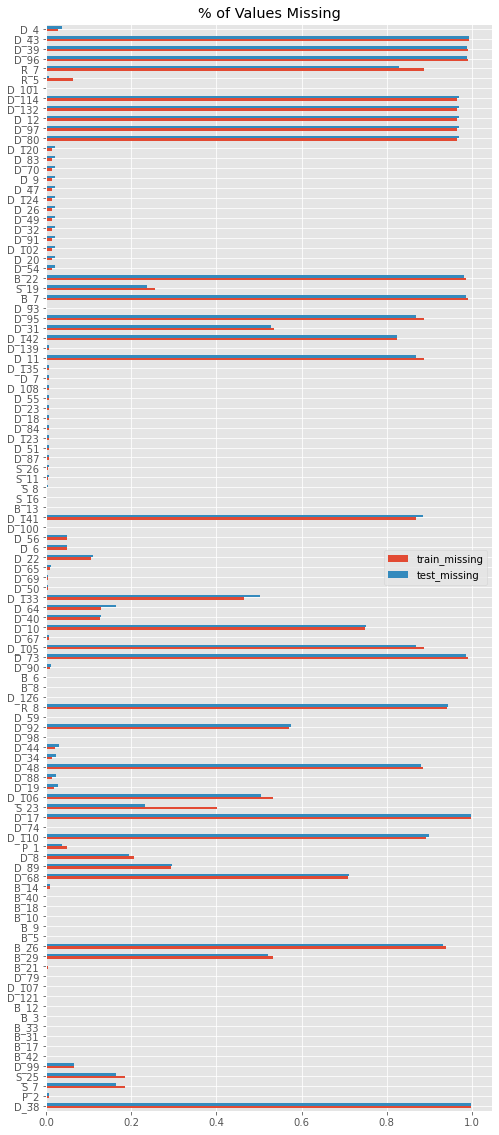

In [16]:
ncounts = pd.DataFrame([train.isna().mean(), test.isna().mean()]).T
ncounts = ncounts.rename(columns={0: "train_missing", 1: "test_missing"})

ncounts.query("train_missing > 0").plot(
    kind="barh", figsize=(8, 20), title="% of Values Missing"
)
plt.show()

In [18]:
ncounts

,train_missing,test_missing
B_37,0.0,0.0
S_24,0.0,0.0
S_4,0.0,0.0
S_14,0.0,0.0
B_25,0.0,0.0
...,...,...
D_29,0.0,0.0
R_1,0.0,0.0
R_28,0.0,0.0
S_5,0.0,0.0


In [25]:
nacols = ncounts.query("train_missing > 0").index.values

## How many missing values per observation?

In [26]:
tt["n_missing"] = tt[nacols].isna().sum(axis=1)
train["n_missing"] = train[nacols].isna().sum(axis=1)
test["n_missing"] = test[nacols].isna().sum(axis=1)

<AxesSubplot:title={'center':'Number of Missing Values per Sample'}>

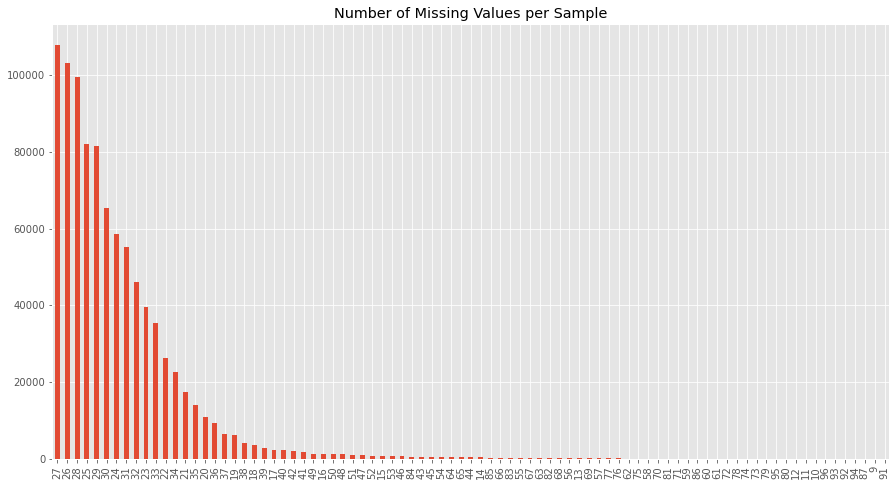

In [29]:
tt["n_missing"].value_counts().plot(
    kind="bar", title="Number of Missing Values per Sample", figsize=(15, 8)
)

In [34]:
tt.query("n_missing >= 96")

,B_37,S_24,S_4,S_14,B_25,D_38,B_30,D_138,P_2,S_7,...,D_85,D_78,D_42,D_52,D_29,R_1,R_28,S_5,isTrain,n_missing
145181,0.008766,0.003960,0.168091,0.280762,1.000977,NaN,0.325195,-0.025024,NaN,0.599121,...,0.007927,0.006035,0.009117,0.008072,0.004150,0.007141,0.009453,0.007965,True,96
429575,0.000949,0.001472,0.923828,0.623535,1.009766,NaN,0.327637,-0.022141,NaN,0.164551,...,0.001223,0.002167,0.005447,0.006691,0.007515,0.006977,0.005718,0.003002,True,96
600751,0.006157,0.006420,0.666000,0.533000,1.002000,NaN,0.328600,-0.018520,NaN,0.194000,...,0.002810,0.006770,0.005245,0.007534,0.000481,0.007385,0.000426,0.003101,False,96
690881,0.005825,0.004875,0.319600,0.531200,1.001000,NaN,0.325700,-0.023570,NaN,0.280500,...,0.009995,0.001984,0.003600,0.001658,0.008840,0.007200,0.002413,0.009544,False,96
824379,0.005314,0.007320,0.491200,1.006000,0.694300,NaN,0.331800,-0.018400,NaN,0.463400,...,0.001338,0.002151,0.001710,0.002699,0.008740,0.001884,0.002136,0.002836,False,96


## Do we see an imbalance in missing values when splitting by other features?

In [37]:
tt.dtypes[tt.dtypes != 'float']

D_36         object
D_44         object
B_41          int64
D_130         int64
isTrain        bool
n_missing     int64
dtype: object

In [38]:
cat_features = ['D_36', 'D_44', 'B_41', 'D_130']

In [39]:
tt.groupby("D_36")["n_missing"].agg(['mean','count'])

,mean,count
D_36,,
CL,25.307662,72843
CO,28.567476,694037
CR,28.303921,145742
XL,24.808573,2053
XM,27.930477,3898
XZ,27.568866,8306


In [40]:
tt.groupby("D_44")["n_missing"].agg(['mean','count'])

,mean,count
D_44,,
O,27.557100,488334
R,28.019252,159514
U,27.788710,255157


In [41]:
tt.groupby("B_41")["n_missing"].agg(['mean','count'])

,mean,count
B_41,,
0,26.091043,5426
1,28.262606,921453


In [42]:
tt.groupby("D_130")["n_missing"].agg(['mean','count'])

,mean,count
D_130,,
0,30.444846,216349
1,27.581553,710530


# Prep - Create Tag Columns with Missing Indicators

In [43]:
tt_missing_tag_df = tt[nacols].isna()
tt_missing_tag_df.columns = \
    [f"{c}_missing" for c in tt_missing_tag_df.columns]

In [44]:
tt = pd.concat([tt, tt_missing_tag_df], axis=1)

In [46]:
tt_missing_tag_df

,D_38_missing,P_2_missing,S_7_missing,S_25_missing,D_99_missing,B_42_missing,B_17_missing,B_31_missing,B_33_missing,B_3_missing,...,D_12_missing,D_132_missing,D_114_missing,D_101_missing,R_5_missing,R_7_missing,D_96_missing,D_39_missing,D_43_missing,D_4_missing
0,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,False
1,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,False
2,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,False
3,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926874,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,False
926875,True,False,True,True,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,False
926876,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,True,True,False
926877,True,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,False


# Protip:
Try to predict the target using only missing value indicators as features

In [45]:
import lightgbm as lgb
print ('Training lightgbm')

# money
params = {
          "objective" : "multiclass",
          "num_class" : 4,
          "num_leaves" : 100,
          "max_depth": 8,
          "learning_rate" : 0.02,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1,
          "metric" : ['auc_mu', 'multi_logloss'],
          "min_data_in_leaf" : 5000,
#           'categorical_feature' : x_train.select_dtypes('object').columns.tolist(),
#             'boosting' : 'dart',
            'num_threads' : 8,
#             'xgboost_dart_mode' : True,
            'is_unbalance' : True,
#             'class_weight' : 'balanced',
            'n_estimators' : 500
}

Training lightgbm


In [58]:
%%time

lgbc = lgb.LGBMClassifier()
lgbmodel = lgbc.fit(tt_missing_tag_df[tt.isTrain],y_train, verbose=1)

CPU times: user 43 s, sys: 407 ms, total: 43.4 s
Wall time: 5.91 s


In [59]:
preds_tr = lgbmodel.predict(tt_missing_tag_df[tt.isTrain])

In [60]:
accuracy_score(y_train, preds_tr)

0.760614757045453

# Level 1 : Pandas

In [62]:
# Fill with a default value
tt.fillna(-999)

,B_37,S_24,S_4,S_14,B_25,D_38,B_30,D_138,P_2,S_7,...,D_12_missing,D_132_missing,D_114_missing,D_101_missing,R_5_missing,R_7_missing,D_96_missing,D_39_missing,D_43_missing,D_4_missing
0,0.006462,0.008118,0.853027,0.556641,1.003906,-999.0,0.021301,0.511230,1.004883,0.081543,...,True,True,True,False,False,True,True,True,True,False
1,0.007748,0.006310,0.758301,0.686035,0.001836,-999.0,0.088501,0.557129,0.687988,0.353027,...,True,True,True,False,False,True,True,True,True,False
2,0.005405,0.005219,0.766602,0.284668,1.002930,-999.0,0.005821,0.854980,0.927734,0.059479,...,True,True,True,False,False,True,True,True,True,False
3,0.004135,0.000032,0.363281,0.004623,0.533691,-999.0,0.002443,0.526367,0.700684,0.334473,...,True,True,True,False,False,True,True,True,True,False
4,0.002968,0.002892,0.757324,0.427734,1.001953,-999.0,0.008247,0.820312,1.001953,0.144287,...,True,True,True,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926874,0.004086,0.000147,0.329600,0.002620,0.294400,-999.0,0.246200,0.180000,0.033170,0.541000,...,True,True,True,False,False,True,True,True,True,False
926875,0.008910,0.000919,0.009230,0.006115,1.003000,-999.0,0.008380,0.550300,0.842000,-999.000000,...,True,True,True,False,False,True,True,True,True,False
926876,0.009766,0.008220,0.323700,0.284200,0.098800,-999.0,0.560000,0.195900,0.156500,0.160200,...,True,True,True,False,False,False,True,True,True,False
926877,0.009980,0.005333,0.486000,0.510700,0.696000,-999.0,0.066400,0.883300,0.825000,0.151600,...,True,True,True,False,False,True,True,True,True,False


In [65]:
tt[tt.dtypes == 'float'].fillna(-999)[:458913].to_feather('Data/x_train__fillna999.ftr')
tt[tt.dtypes == 'float'].fillna(-999)[458913:].reset_index(drop=True).to_feather('Data/x_test__fillna999.ftr')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).